In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import auxiliares as aux
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lectura de datos

data = pd.read_csv('../../dataC/imputado.csv')

In [4]:
# Generamos los grupos

data['Age_group'] = pd.qcut(data['Age'], q=4, labels=['Joven', 'Adulto', 'Mediano', 'Senior'])
data['Exp_group'] = pd.cut(data['Years_of_Experience'], bins=[0,5,15,40], labels=['Junior', 'Medio', 'Senior'])

Ejecutamos una primera comparación de modelos.

🚀 INICIANDO PIPELINE

🚀 Entrenando modelos mejorados...
   Entrenando Linear Regression...
      RMSE: $14,871.18
      R²: 0.900
      CV RMSE: $15,603.55 (±6,387.89)
   Entrenando Ridge Regression...
      RMSE: $14,845.59
      R²: 0.901
      CV RMSE: $15,580.45 (±6,374.49)
   Entrenando Random Forest...
      RMSE: $17,204.26
      R²: 0.867
      CV RMSE: $15,601.76 (±6,001.54)
   Entrenando Gradient Boosting...
      RMSE: $14,784.17
      R²: 0.901
      CV RMSE: $15,715.79 (±6,922.34)
   Entrenando LightGBM...
      RMSE: $15,564.18
      R²: 0.891
      CV RMSE: $15,613.82 (±7,993.11)
   Entrenando SVR (RBF)...
      RMSE: $43,017.58
      R²: 0.166
      CV RMSE: $45,601.16 (±12,720.35)
   Entrenando SVR (Linear)...
      RMSE: $15,420.63
      R²: 0.893
      CV RMSE: $18,164.56 (±9,127.46)

🏆 Mejor modelo: Ridge Regression
   RMSE: $14,845.59
   R²: 0.901
   CV RMSE: $15,580.45
⚠️  El modelo no tiene feature_importances_

📈 Analizando predicciones...

Estadísticas de Error

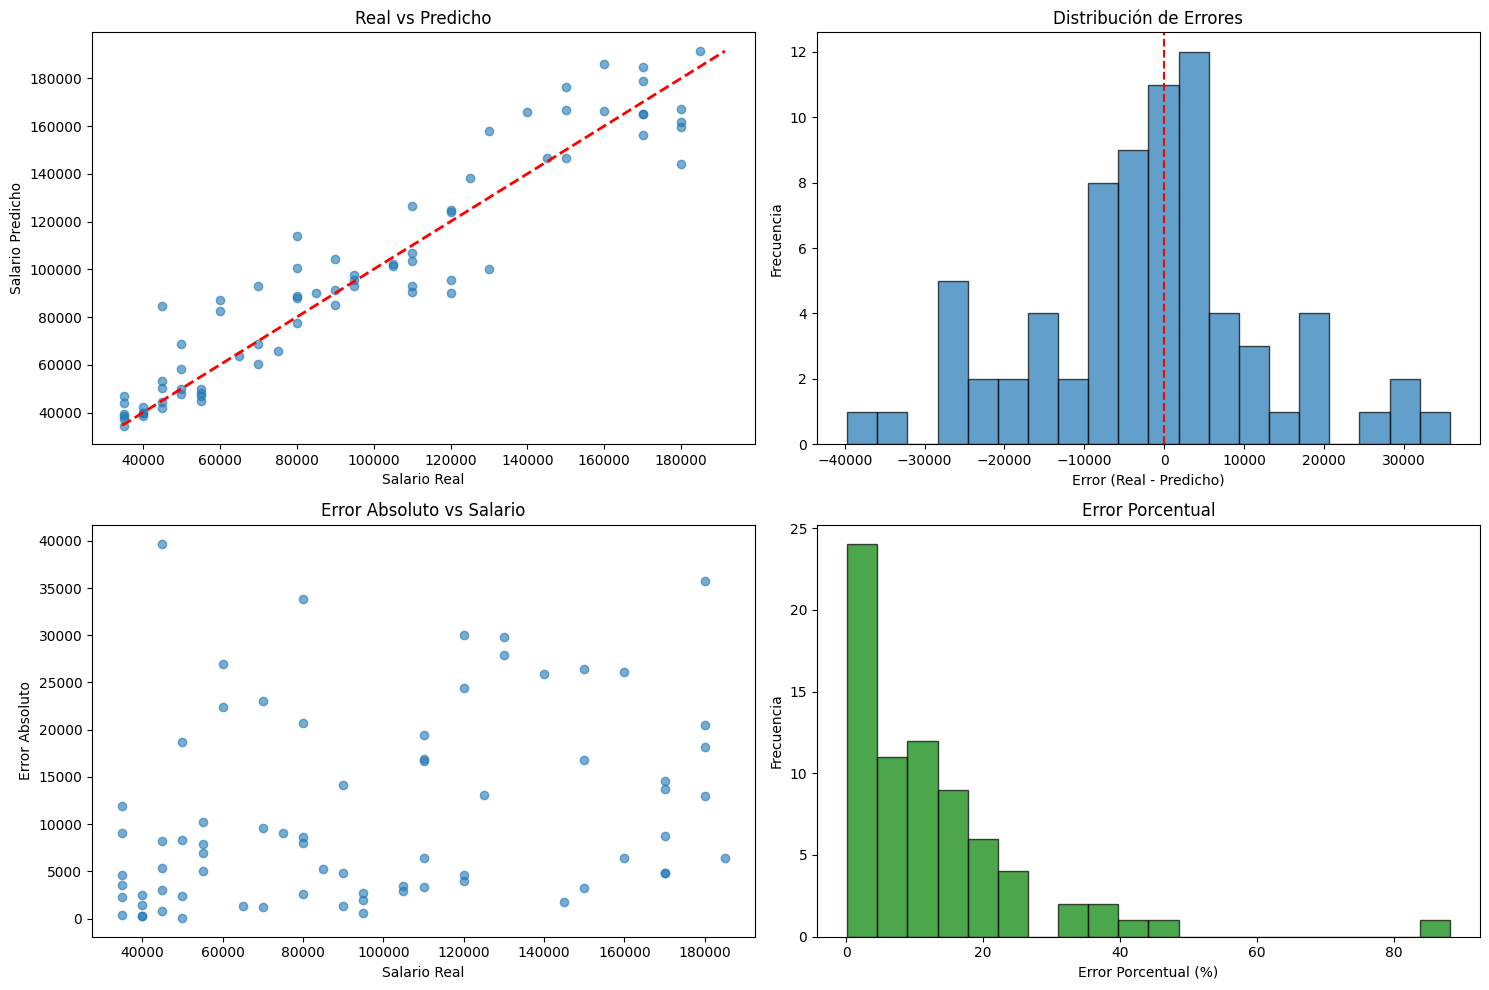


📊 Comparación de modelos...


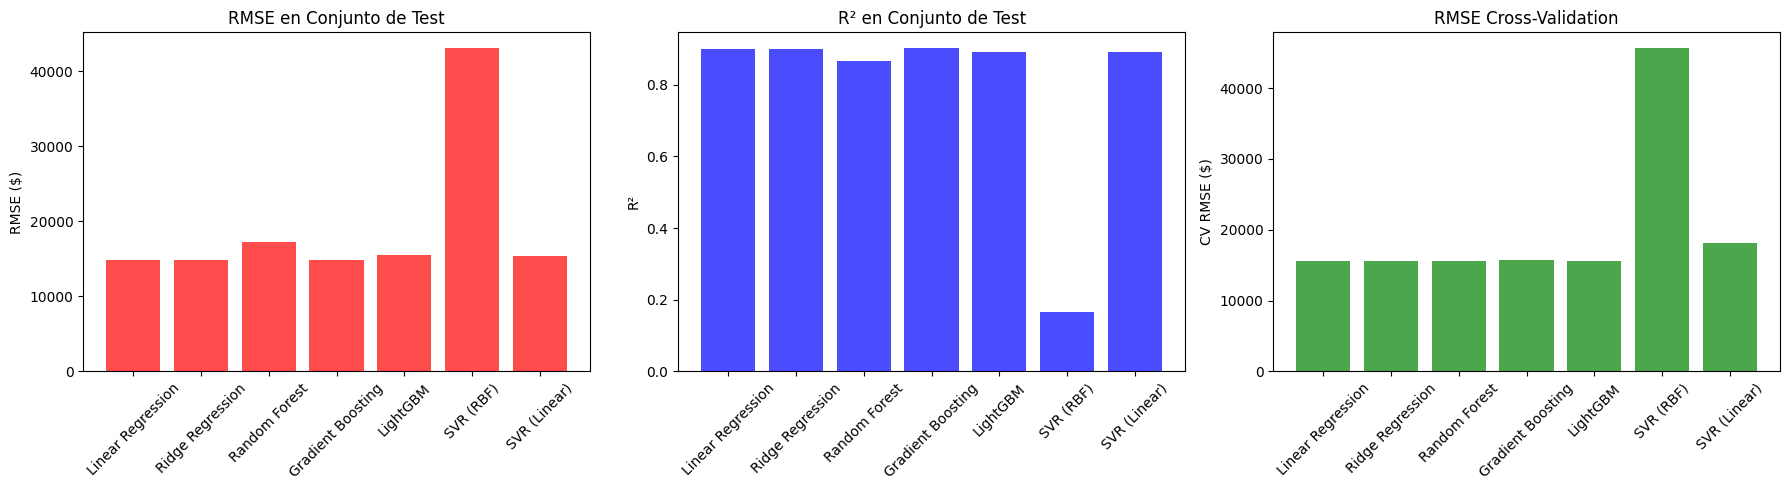


🏆 RESUMEN FINAL:
   Mejor modelo: Ridge Regression
   RMSE: $14,845.59
   R²: 0.901
   CV RMSE: $15,580.45
   Características utilizadas: 6


In [32]:
print("🚀 INICIANDO PIPELINE")


data = data.dropna()
data.columns = data.columns.str.replace(' ', '_')

# Actualizar nombres de columnas categóricas después del cambio
categorical_columns = ['Gender', 'Education_Level', 'Age_group', 'Exp_group']
for col in categorical_columns:
    data[col] = data[col].astype('category')

for col in categorical_columns:
    le = LabelEncoder()
    data[col + '_encoded'] = le.fit_transform(data[col])

X = data.drop(['id','Salary','Gender','Education_Level','Job_Title','Description','Age_group', 'Exp_group'], axis=1)
y = data['Salary']


# Entrenar modelo
model_results,model = aux.train_models(X, y)



# Analizar importancia
feature_importance = aux.analyze_feature_importance(X,feature_names,model)

# Analizar predicciones
predictions_analysis = aux.analyze_predictions(model_results)

# Comparar modelos
aux.create_comparison_chart(model_results)

# Resumen final
best_name = model_results['best_model_name']
best_result = model_results['model_results'][best_name]

print(f"\n🏆 RESUMEN FINAL:")
print(f"   Mejor modelo: {best_name}")
print(f"   RMSE: ${best_result['rmse']:,.2f}")
print(f"   R²: {best_result['r2']:.3f}")
print(f"   CV RMSE: ${best_result['cv_rmse']:,.2f}")
print(f"   Características utilizadas: {len(feature_names)}")

Creemos que el lgbm con feature enginering tiene que dar mejores resultados.
Ejecutamos Pipeline con un feature enginering

🚀 INICIANDO PIPELINE FE
🔧 Creando todas las características mejoradas...
✅ Creadas 50 características en total
   - Variables numéricas básicas: 3
   - Variables de educación: 3
   - Variables de job category: 12
   - Variables de seniority: 6
   - Variables de texto: 4
   - Ratios y scores: 5

🚀 Entrenando modelos mejorados...
   Entrenando Linear Regression...
      RMSE: $11,271.08
      R²: 0.943
      CV RMSE: $16,018.90 (±9,235.36)
   Entrenando Ridge Regression...
      RMSE: $11,075.01
      R²: 0.945
      CV RMSE: $15,328.33 (±8,398.71)
   Entrenando Random Forest...
      RMSE: $11,561.41
      R²: 0.940
      CV RMSE: $14,501.31 (±9,592.63)
   Entrenando Gradient Boosting...
      RMSE: $11,405.00
      R²: 0.941
      CV RMSE: $14,674.23 (±9,898.18)
   Entrenando LightGBM...
      RMSE: $10,102.58
      R²: 0.954
      CV RMSE: $14,210.15 (±8,583.20)
   Entrenando SVR (RBF)...
      RMSE: $45,478.80
      R²: 0.068
      CV RMSE: $47,605.39 (±12,823.66)
   Entrenando SVR (

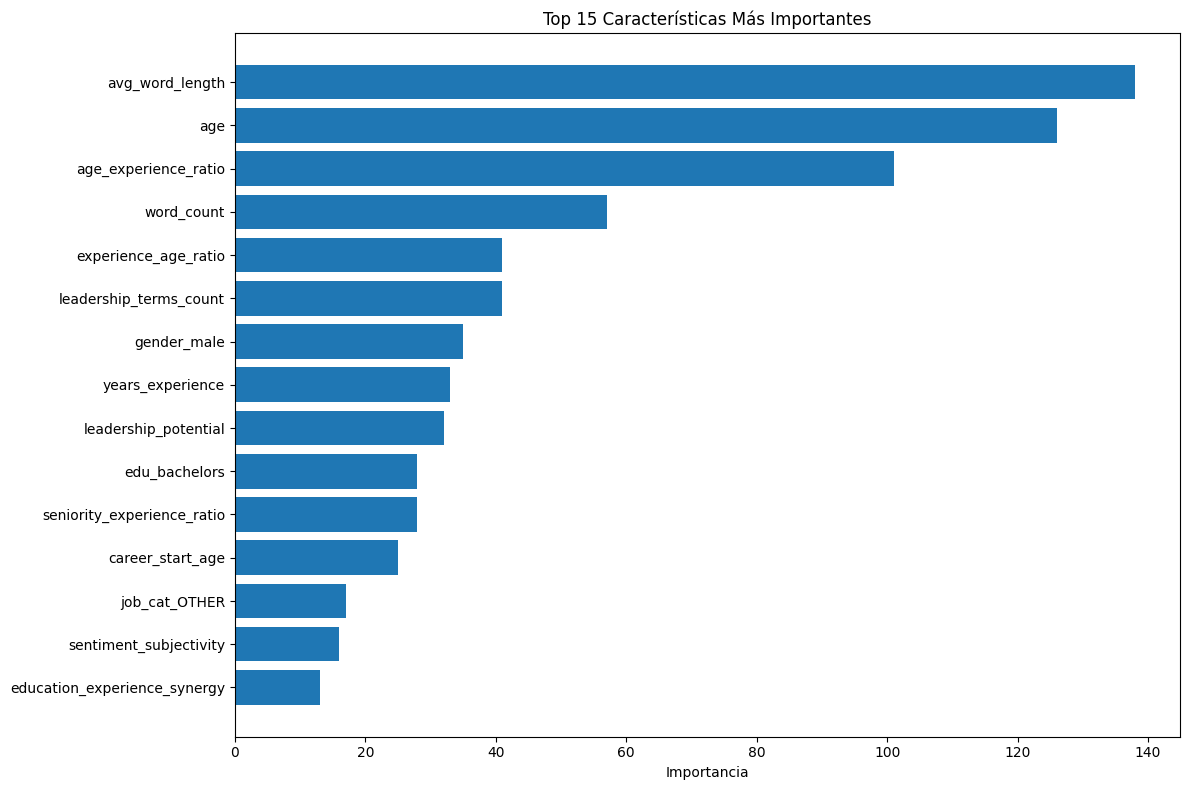


📈 Analizando predicciones...

Estadísticas de Error (LightGBM):
   Error promedio: $-1,208.35
   Error absoluto promedio: $7,346.86
   Error porcentual promedio: 8.7%
   Predicciones dentro del ±10%: 69.9%
   Predicciones dentro del ±20%: 93.2%


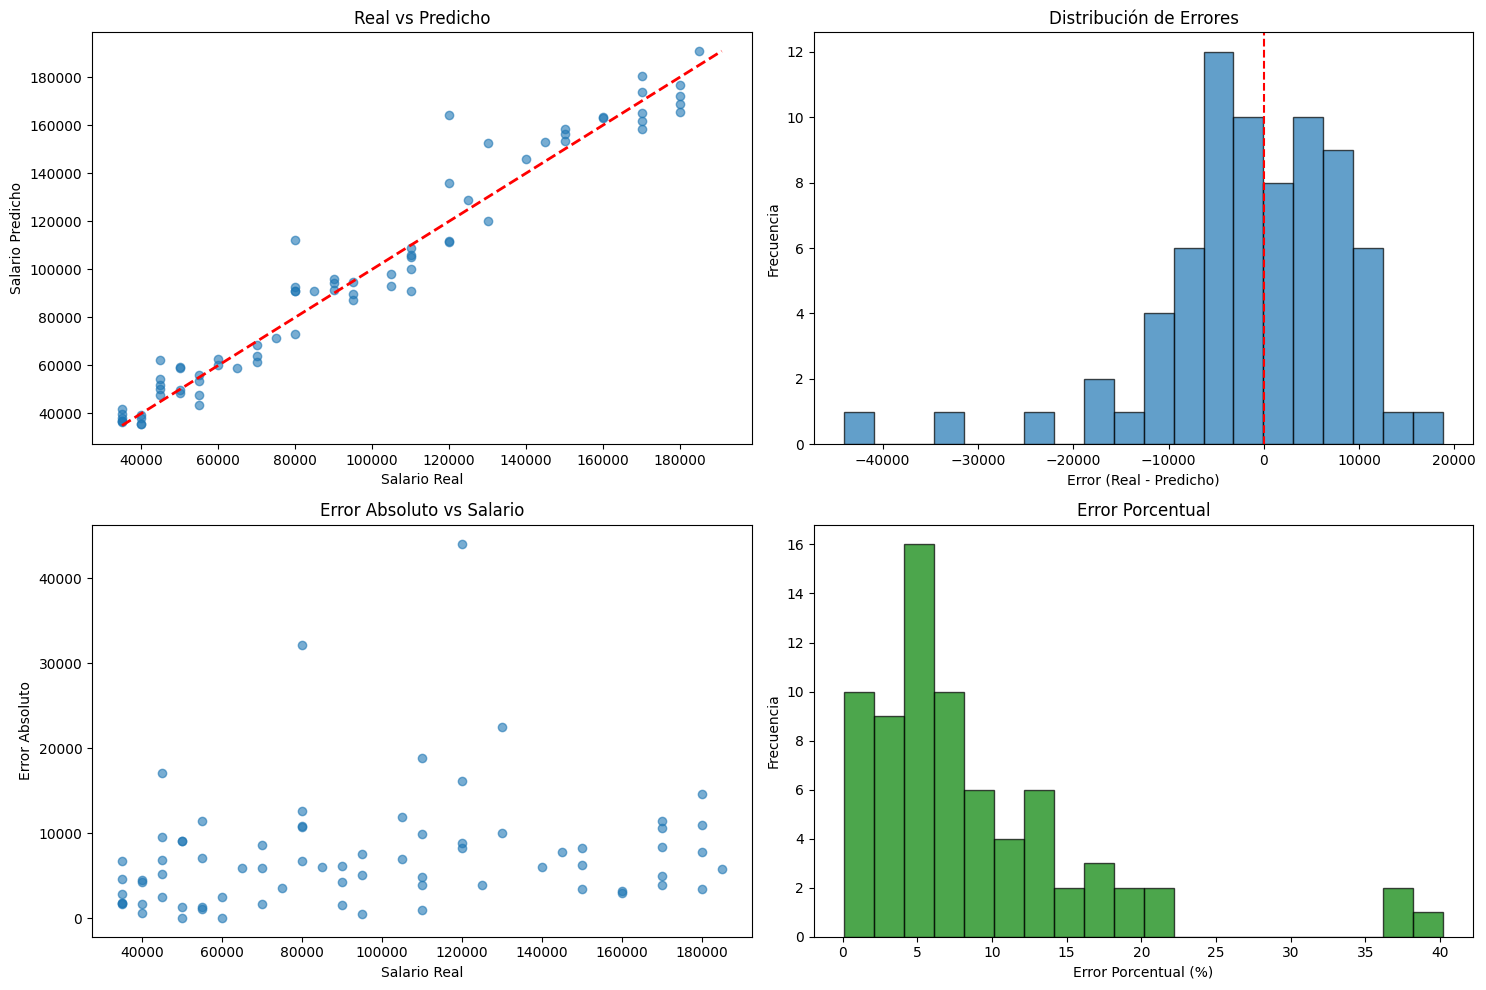


📊 Comparación de modelos...


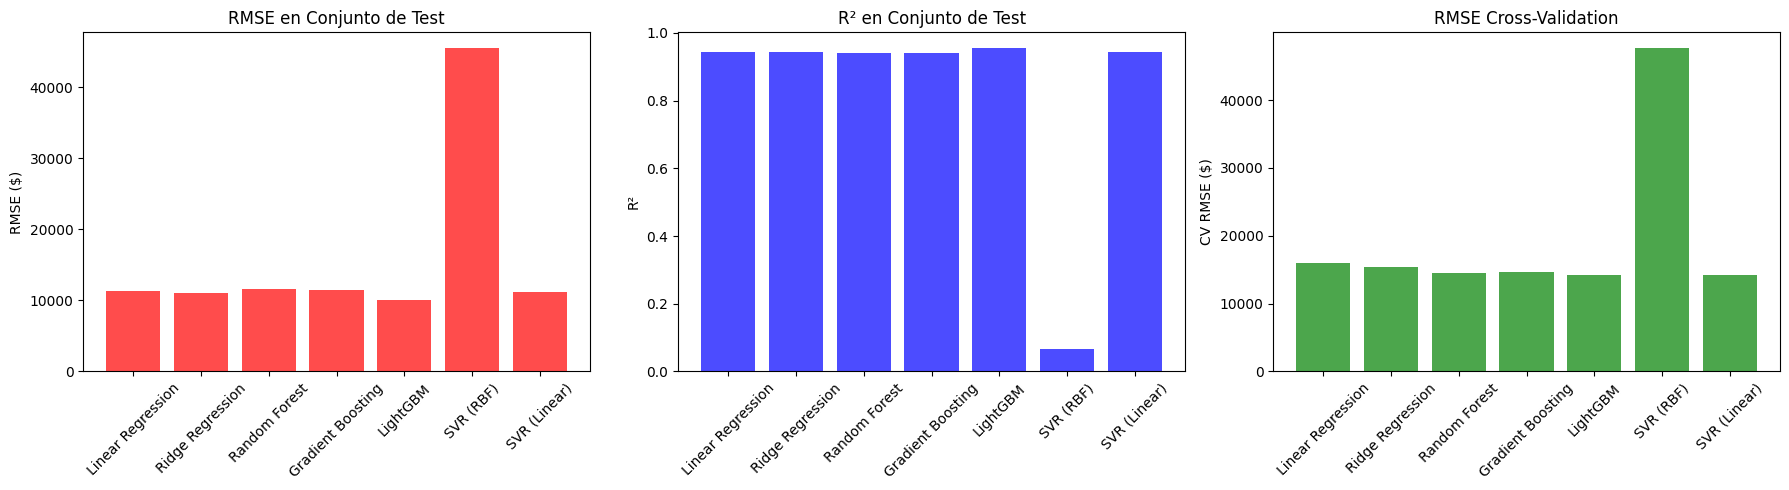


🏆 RESUMEN FINAL:
   Mejor modelo: LightGBM
   RMSE: $10,102.58
   R²: 0.954
   CV RMSE: $14,210.15
   Características utilizadas: 50


In [33]:
def pipeline_fe(data):
    print("🚀 INICIANDO PIPELINE FE")


    # Crear características 
    X,feature_names = aux.create_features(data)
    y = data['Salary']

    # Entrenar modelo 
    model_results,model = aux.train_models(X, y)


    # Analizar importancia
    feature_importance = aux.analyze_feature_importance(X,feature_names,model)

    # Analizar predicciones
    predictions_analysis = aux.analyze_predictions(model_results)

    # Comparar modelos
    aux.create_comparison_chart(model_results)

    # Resumen final
    best_name = model_results['best_model_name']
    best_result = model_results['model_results'][best_name]

    print(f"\n🏆 RESUMEN FINAL:")
    print(f"   Mejor modelo: {best_name}")
    print(f"   RMSE: ${best_result['rmse']:,.2f}")
    print(f"   R²: {best_result['r2']:.3f}")
    print(f"   CV RMSE: ${best_result['cv_rmse']:,.2f}")
    print(f"   Características utilizadas: {len(feature_names)}")
     
    return model_results,model,X,feature_importance
model_results,model,X,feature_importance=pipeline_fe(data)    

In [34]:
feature_importance

,feature,importance
42,avg_word_length,138
0,age,126
2,age_experience_ratio,101
41,word_count,57
4,experience_age_ratio,41
39,leadership_terms_count,41
7,gender_male,35
1,years_experience,33
47,leadership_potential,32
9,edu_bachelors,28


Analizar modelos

In [35]:
# 1. Entrenar modelos 
train_results = model_results
model = model
# 2. Evaluar modelos 
results_df, recommendations = aux.comprehensive_model_evaluation(
    train_results  # Pasar todo el objeto de resultados, no solo model_results
)

# 3. Mostrar análisis completo
if results_df is not None:
    aux.print_comprehensive_analysis(results_df, recommendations)

# 4. Seleccionar modelo según tu caso de uso
if recommendations:
    print("\\n🎯 RECOMENDACIONES:")
    print(f"Para RRHH/Negocio: {recommendations['best_business']['model']}")
    print(f"Para investigación: {recommendations['max_precision']['model']}")
    print(f"Para producción: {recommendations['max_robustness']['model']}")
    print(f"Balance general: {recommendations['best_overall']['model']}")



📊 EVALUACIÓN COMPRENSIVA DE MODELOS
📏 Datos: X_test: (73, 50), y_test: 73

📋 Evaluando Linear Regression...

📋 Evaluando Ridge Regression...

📋 Evaluando Random Forest...

📋 Evaluando Gradient Boosting...

📋 Evaluando LightGBM...

📋 Evaluando SVR (RBF)...

📋 Evaluando SVR (Linear)...

📊 TABLA COMPARATIVA COMPLETA:
            Model    R²      RMSE       MAE  CV_R²_mean  CV_RMSE_mean  Within_20%  Business_Score
Linear Regression 0.943 11271.080  9036.808       0.886     16018.904      87.671           0.905
 Ridge Regression 0.945 11075.009  8864.488       0.896     15328.327      87.671           0.907
    Random Forest 0.940 11561.410  7556.849       0.908     14501.308      91.781           0.925
Gradient Boosting 0.941 11404.999  7959.642       0.906     14674.233      93.151           0.930
         LightGBM 0.954 10102.579  7346.859       0.911     14210.155      93.151           0.937
        SVR (RBF) 0.068 45478.796 39098.853      -0.006     47605.392      28.767           0.23

Un modelo con datos iniciales nos da como mejor modelo Ridge Regression y luego de aplicar un FE nos da mejor un lgbm por lo que vamos a continuar con dicho modelo.

In [36]:
! pip freeze > requirements.txt

# pendiente interevalo de confianza


🚀 Entrenando modelos con intervalos de confianza al 95%...
📊 Cross-validation: 10 folds

   📈 Evaluando Linear Regression...
      📊 Test R²: 0.911
      📊 Test RMSE: $14,059
      📊 CV R² (IC 95%): 0.896 [0.872, 0.920]
      📊 CV RMSE (IC 95%): $15,021 [$13,246, $16,795]
      📊 Estabilidad: 0.962

   📈 Evaluando Ridge Regression...
      📊 Test R²: 0.911
      📊 Test RMSE: $14,023
      📊 CV R² (IC 95%): 0.896 [0.872, 0.920]
      📊 CV RMSE (IC 95%): $14,984 [$13,204, $16,764]
      📊 Estabilidad: 0.963

   📈 Evaluando Random Forest...
      📊 Test R²: 0.938
      📊 Test RMSE: $11,698
      📊 CV R² (IC 95%): 0.926 [0.890, 0.961]
      📊 CV RMSE (IC 95%): $12,439 [$8,762, $16,116]
      📊 Estabilidad: 0.946

   📈 Evaluando Gradient Boosting...
      📊 Test R²: 0.934
      📊 Test RMSE: $12,142
      📊 CV R² (IC 95%): 0.927 [0.892, 0.961]
      📊 CV RMSE (IC 95%): $12,478 [$8,825, $16,131]
      📊 Estabilidad: 0.947

   📈 Evaluando LightGBM...
      ❌ Error entrenando LightGBM: Do not 

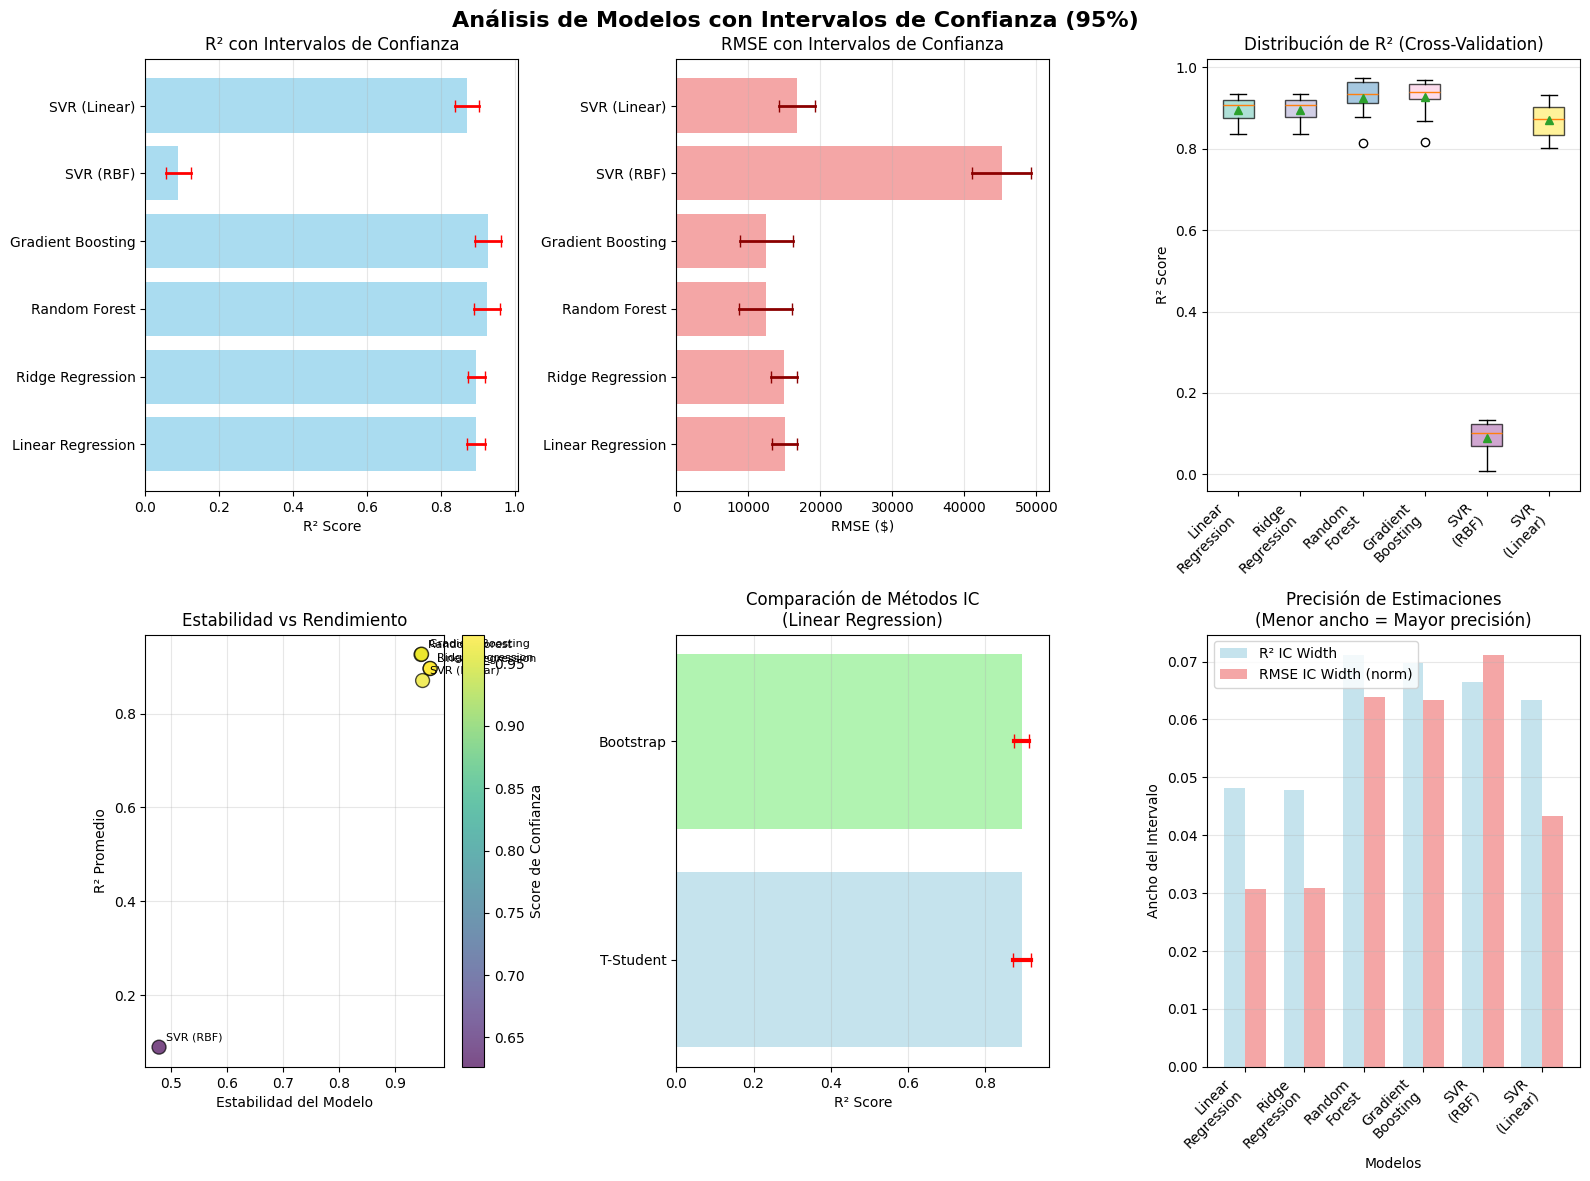


🎯 Analizando importancia de características con incertidumbre (n_bootstrap=100)...

TOP 20 CARACTERÍSTICAS MÁS IMPORTANTES (con intervalos de confianza):
--------------------------------------------------------------------------------
Years_of_Experience       | Imp: 0.4573 | IC: [0.4164, 0.4981] | Estab: 0.550
Age                       | Imp: 0.3896 | IC: [0.3488, 0.4304] | Estab: 0.472
Exp_group_encoded         | Imp: 0.0545 | IC: [0.0498, 0.0592] | Estab: 0.567
Unnamed:_0                | Imp: 0.0469 | IC: [0.0451, 0.0486] | Estab: 0.815
Education_Level_encoded   | Imp: 0.0429 | IC: [0.0409, 0.0450] | Estab: 0.764
Gender_encoded            | Imp: 0.0063 | IC: [0.0058, 0.0068] | Estab: 0.601
Age_group_encoded         | Imp: 0.0025 | IC: [0.0019, 0.0031] | Estab: -0.160


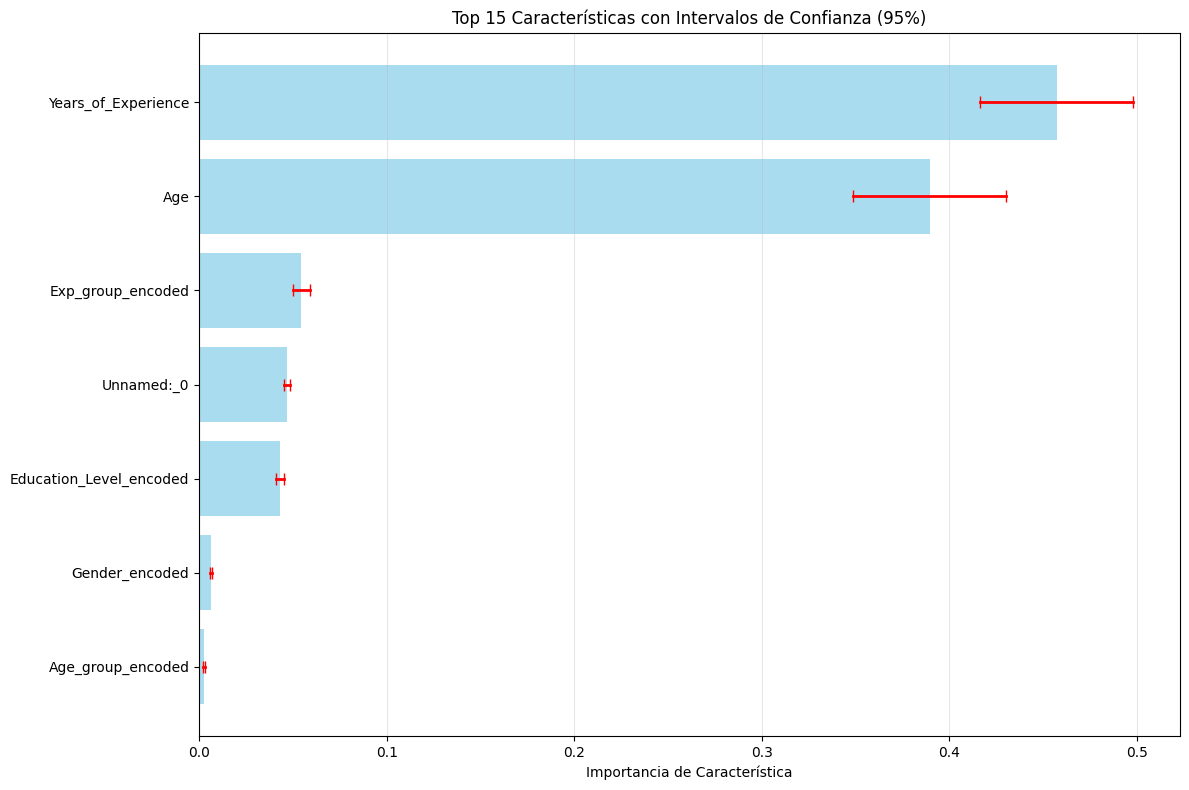


📈 Analizando predicciones...

Estadísticas de Error (Gradient Boosting):
   Error promedio: $-1,250.63
   Error absoluto promedio: $8,698.55
   Error porcentual promedio: 10.1%
   Predicciones dentro del ±10%: 63.0%
   Predicciones dentro del ±20%: 89.0%

Intervalos de confianza (95%):
   R² CV: 0.927 [0.892, 0.961]


In [10]:
import auxiliaresic as auxic

data = data.dropna()
data.columns = data.columns.str.replace(' ', '_')

# Actualizar nombres de columnas categóricas después del cambio
categorical_columns = ['Gender', 'Education_Level', 'Age_group', 'Exp_group']
for col in categorical_columns:
    data[col] = data[col].astype('category')

for col in categorical_columns:
    le = LabelEncoder()
    data[col + '_encoded'] = le.fit_transform(data[col])

X = data.drop(['id','Salary','Gender','Education_Level','Job_Title','Description','Age_group', 'Exp_group'], axis=1)
y = data['Salary']






# ✅ FORMA CORRECTA - Llamar directamente a la función específica
model_results, best_model = auxic.train_models_with_confidence_intervals(
    X, y, 
    test_size=0.2,
    random_state=42,
    cv_folds=10,
    confidence_level=0.95
)

# Análisis estadístico completo
summary_table = auxic.create_statistical_summary_table(model_results)

# Comparación estadística entre modelos
comparison_stats = auxic.statistical_model_comparison(model_results, alpha=0.05)

# Recomendación basada en evidencia estadística
recommendation = auxic.recommend_best_model_statistical(
    model_results, 
    use_case='business'  # 'precision', 'stability', 'general'
)

# Visualizaciones con intervalos de confianza
auxic.create_confidence_interval_visualization(model_results)

# Análisis de características con incertidumbre (versión mejorada)
feature_importance = auxic.analyze_feature_importance_with_uncertainty(
    X, X.columns, best_model, model_results, n_bootstrap=100
)

# Análisis de predicciones (compatible con tu código actual)
predictions_analysis = auxic.analyze_predictions(model_results)

🔧 Creando todas las características mejoradas...
✅ Creadas 50 características en total
   - Variables numéricas básicas: 3
   - Variables de educación: 3
   - Variables de job category: 12
   - Variables de seniority: 6
   - Variables de texto: 4
   - Ratios y scores: 5

🚀 Entrenando modelos con intervalos de confianza al 95%...
📊 Cross-validation: 10 folds

   📈 Evaluando Linear Regression...
      📊 Test R²: 0.944
      📊 Test RMSE: $11,193
      📊 CV R² (IC 95%): 0.899 [0.851, 0.947]
      📊 CV RMSE (IC 95%): $14,593 [$11,106, $18,080]
      📊 Estabilidad: 0.925

   📈 Evaluando Ridge Regression...
      📊 Test R²: 0.945
      📊 Test RMSE: $11,002
      📊 CV R² (IC 95%): 0.907 [0.865, 0.948]
      📊 CV RMSE (IC 95%): $14,060 [$10,891, $17,229]
      📊 Estabilidad: 0.936

   📈 Evaluando Random Forest...
      📊 Test R²: 0.937
      📊 Test RMSE: $11,834
      📊 CV R² (IC 95%): 0.914 [0.872, 0.955]
      📊 CV RMSE (IC 95%): $13,201 [$9,500, $16,902]
      📊 Estabilidad: 0.937

   📈 Eval

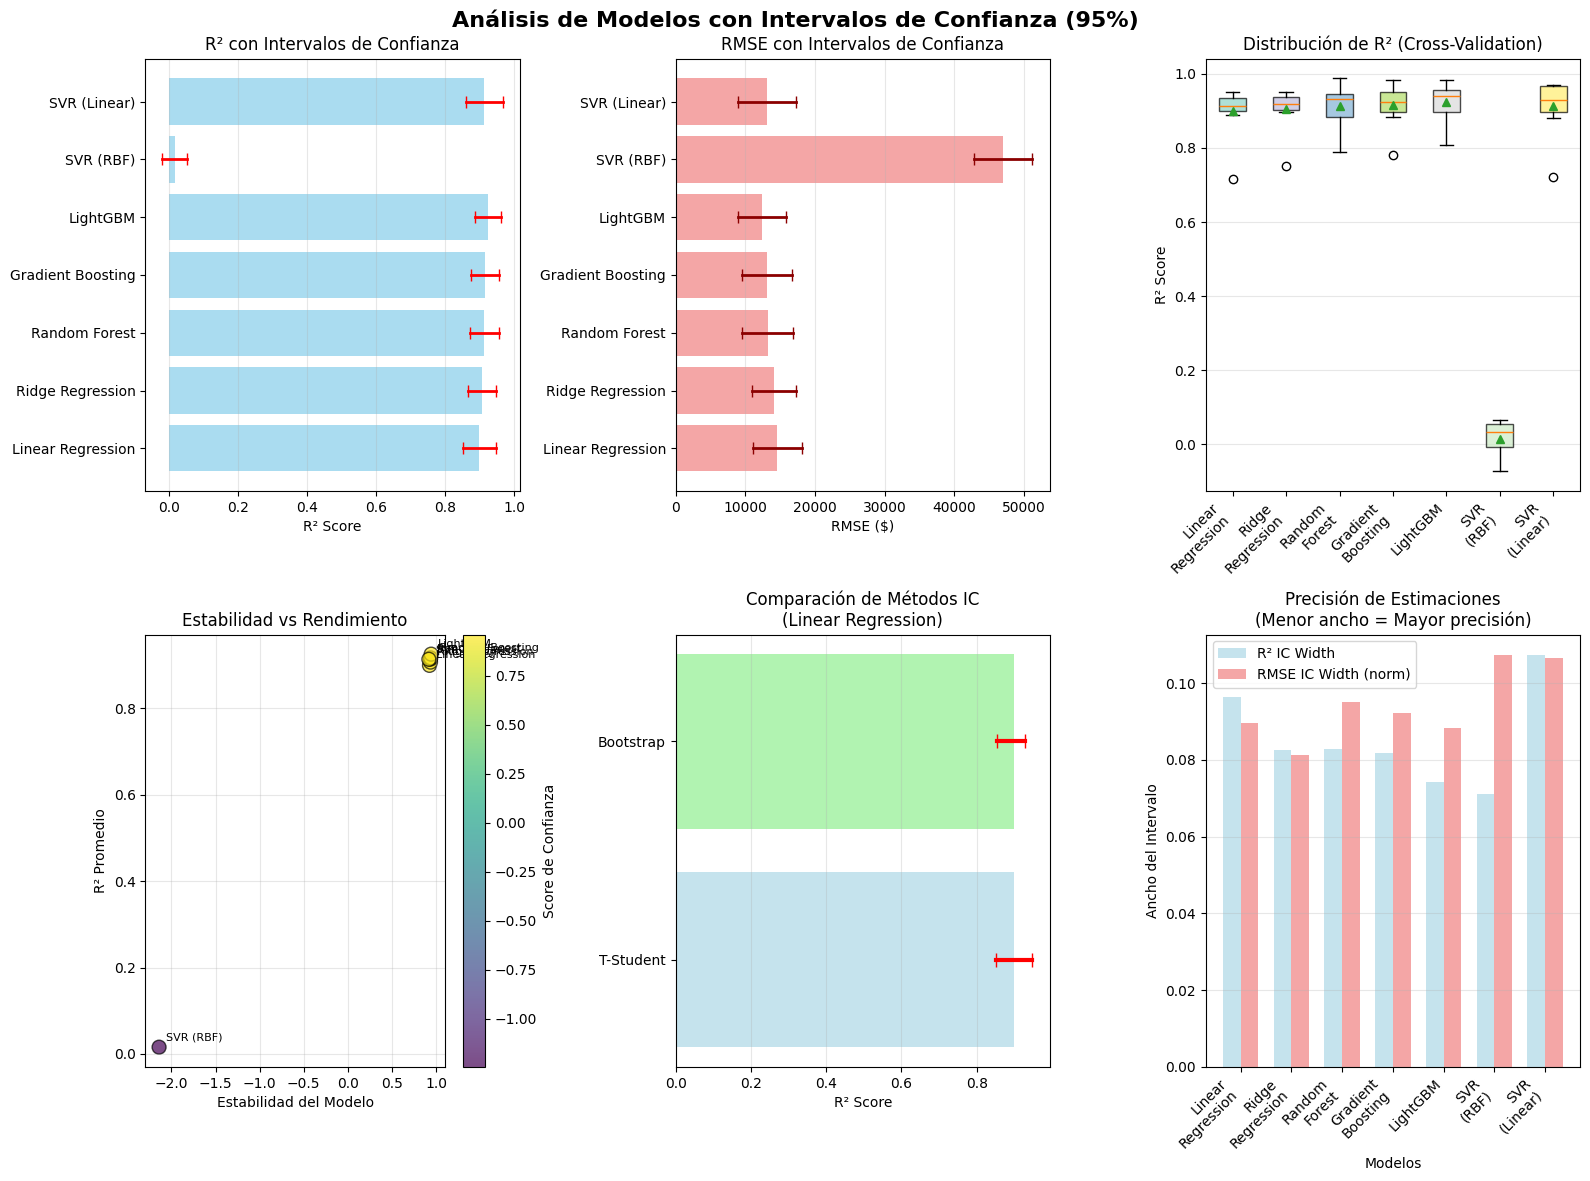


🎯 Analizando importancia de características con incertidumbre (n_bootstrap=100)...

TOP 20 CARACTERÍSTICAS MÁS IMPORTANTES (con intervalos de confianza):
--------------------------------------------------------------------------------
avg_word_length           | Imp: 140.7200 | IC: [136.9275, 144.5125] | Estab: 0.864
age                       | Imp: 98.7500 | IC: [95.4375, 102.0625] | Estab: 0.831
age_experience_ratio      | Imp: 93.6500 | IC: [90.5603, 96.7397] | Estab: 0.834
word_count                | Imp: 78.4600 | IC: [75.6412, 81.2788] | Estab: 0.819
years_experience          | Imp: 47.5900 | IC: [45.6641, 49.5159] | Estab: 0.796
leadership_terms_count    | Imp: 45.7600 | IC: [43.7548, 47.7652] | Estab: 0.779
experience_age_ratio      | Imp: 42.8000 | IC: [40.4754, 45.1246] | Estab: 0.726
career_start_age          | Imp: 36.7600 | IC: [34.9962, 38.5238] | Estab: 0.758
gender_male               | Imp: 31.7400 | IC: [30.4379, 33.0421] | Estab: 0.793
seniority_experience_ratio | Im

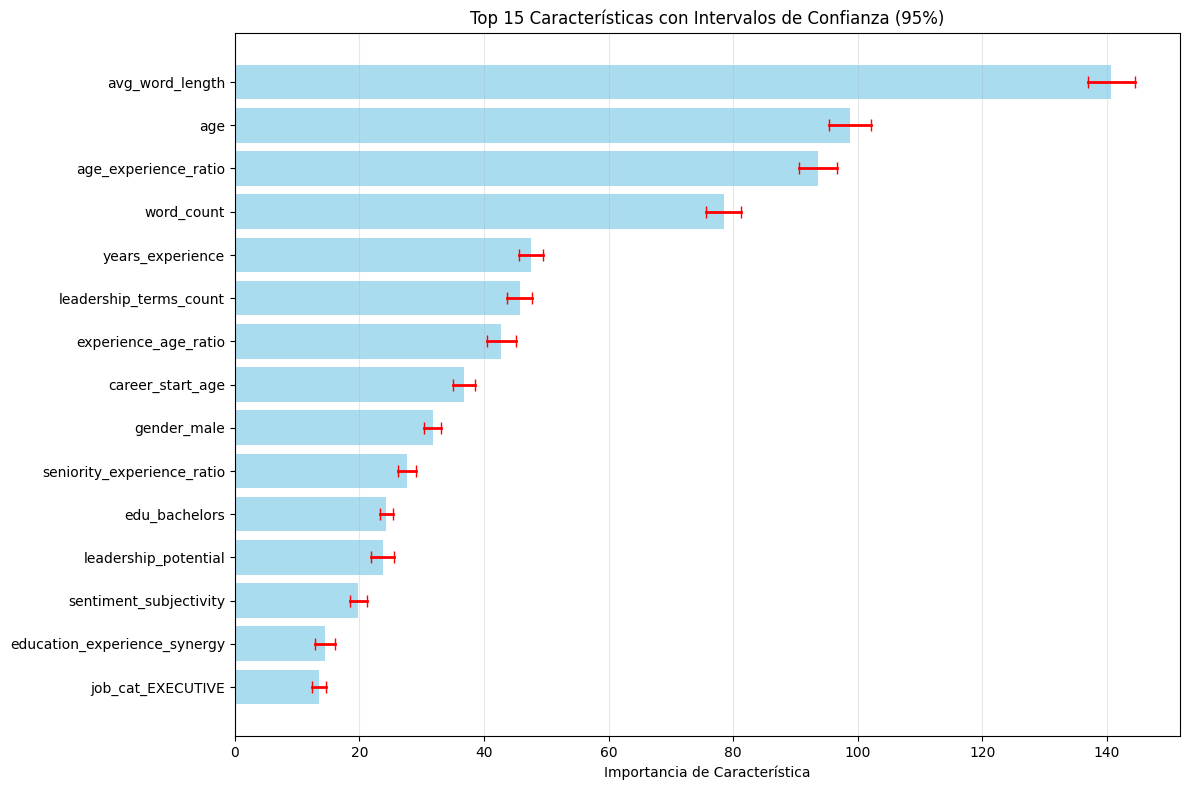


📈 Analizando predicciones...

Estadísticas de Error (LightGBM):
   Error promedio: $-1,246.60
   Error absoluto promedio: $7,309.01
   Error porcentual promedio: 8.6%
   Predicciones dentro del ±10%: 71.2%
   Predicciones dentro del ±20%: 90.4%

Intervalos de confianza (95%):
   R² CV: 0.925 [0.888, 0.962]


In [9]:
X,feature_names = aux.create_features(data)

#X = data.drop(['id','Salary','Gender','Education_Level','Job_Title','Description','Age_group', 'Exp_group'], axis=1)
y = data['Salary']






# ✅ FORMA CORRECTA - Llamar directamente a la función específica
model_results, best_model = auxic.train_models_with_confidence_intervals(
    X, y, 
    test_size=0.2,
    random_state=42,
    cv_folds=10,
    confidence_level=0.95
)

# Análisis estadístico completo
summary_table = auxic.create_statistical_summary_table(model_results)

# Comparación estadística entre modelos
comparison_stats = auxic.statistical_model_comparison(model_results, alpha=0.05)

# Recomendación basada en evidencia estadística
recommendation = auxic.recommend_best_model_statistical(
    model_results, 
    use_case='business'  # 'precision', 'stability', 'general'
)

# Visualizaciones con intervalos de confianza
auxic.create_confidence_interval_visualization(model_results)

# Análisis de características con incertidumbre (versión mejorada)
feature_importance = auxic.analyze_feature_importance_with_uncertainty(
    X, feature_names, best_model, model_results, n_bootstrap=100
)

# Análisis de predicciones (compatible con tu código actual)
predictions_analysis = auxic.analyze_predictions(model_results)



